In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
# Import the data and print the first three rows 
recipe = pd.read_csv("../data/RAW_recipes.csv")
recipe.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


In [3]:
# How many recipes are in the dataset ?
print('There are '+str(recipe.shape[0])+ ' recipes in the dataset')
print('There are '+str(recipe.shape[1])+ ' variables in the dataset')
print('Here is the list of variables and their type :')
print(recipe.dtypes)


There are 231637 recipes in the dataset
There are 12 variables in the dataset
Here is the list of variables and their type :
name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object


In [4]:
# Are there any missing values in your dataset?
print('Le nombre de missing values par colonnes :')
#print(recipe.isnull().sum())
print(recipe.isna().sum())

Le nombre de missing values par colonnes :
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64


In [5]:
# Sélectionner les lignes où 'description' est NaN
observations_nan = recipe[recipe['description'].isna()]

# Afficher un échantillon aléatoire de ces observations (par exemple, 5 lignes)
echantillon = observations_nan.sample(5)

print(echantillon)

                            name     id  minutes  contributor_id   submitted  \
155235         peach pecan bread  44578       75           26399  2002-10-29   
84082    finnish creamy pea soup  41513      810           21730  2002-09-30   
24855        blackberry jam cake   6945       30           34879  2000-03-06   
60454   cranberry citrus muffins  35223       33           17803  2002-07-27   
136248  mini marbled cheesecakes  11423       40            8728  2001-09-05   

                                                     tags  \
155235  ['weeknight', 'time-to-make', 'course', 'main-...   
84082   ['weeknight', 'time-to-make', 'course', 'main-...   
24855   ['30-minutes-or-less', 'time-to-make', 'course...   
60454   ['60-minutes-or-less', 'time-to-make', 'course...   
136248  ['60-minutes-or-less', 'time-to-make', 'course...   

                                           nutrition  n_steps  \
155235  [388.8, 27.0, 106.0, 21.0, 12.0, 32.0, 17.0]       15   
84082     [284.4, 11.0

In [6]:
# on va remplacer ces NaN par "missing" 
recipe = recipe.fillna("missing")
print(recipe.head())

                                         name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [

In [7]:
print("Total number of missing values:", recipe.isnull().sum().sum())

Total number of missing values: 0


In [8]:
# Average time 
avg_time = recipe['minutes'].mean()
print("Average time for recipes: ", avg_time)

Average time for recipes:  9398.546009488984


In [9]:
# Get hours with floor division 
hours = avg_time // 60
# Get minutes with modulus
minutes = avg_time % 60
print("Average time is {} hours and {} minutes!".format(round(hours),round(minutes)))

Average time is 156 hours and 39 minutes!


In [10]:
max_value_minutes = recipe['minutes'].max()
min_value_minutes = recipe['minutes'].min()

print('Maximum cooking time', max_value_minutes)
print('Minimum cooking time', min_value_minutes)

Maximum cooking time 2147483647
Minimum cooking time 0


In [11]:
# The row(s) of the dataframe corresponding to the maximum value for minutes
recipe.loc[recipe['minutes'] == max_value_minutes]


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


In [12]:
# The row(s) of the dataframe corresponding to the minimum value for minutes
recipe.loc[recipe['minutes'] == min_value_minutes].head(5)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",missing,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
2451,acorn magic delights,1712,0,1534,1999-10-01,"['15-minutes-or-less', 'time-to-make', 'course...","[148.4, 15.0, 28.0, 2.0, 3.0, 21.0, 4.0]",13,"['melt the butter or margarine over low heat',...",missing,"['butter', 'brown sugar', 'pecans', 'all-purpo...",7
3079,albanian byrek,4880,0,1534,1999-11-24,"['15-minutes-or-less', 'time-to-make', 'course...","[354.4, 42.0, 25.0, 59.0, 37.0, 37.0, 2.0]",14,"['prepare the dough with flour , 1 and a half ...","the directions to this are vague, but maybe yo...","['flour', 'water', 'oil', 'vinegar', 'salt', '...",9
3193,alfredo sauce with pasta,3258,0,1534,1999-10-10,"['15-minutes-or-less', 'time-to-make', 'course...","[1902.9, 287.0, 5.0, 140.0, 104.0, 583.0, 3.0]",8,['cook noodles or fettuccine according to pack...,missing,"['butter', 'heavy cream', 'parmesan cheese', '...",6
3259,alice s doughnuts,2284,0,1752,1999-10-18,"['15-minutes-or-less', 'time-to-make', 'course...","[107.3, 6.0, 20.0, 3.0, 3.0, 10.0, 4.0]",17,"['in a large bowl , beat the eggs until foamy'...",missing,"['eggs', 'sugar', 'milk', 'shortening', 'vanil...",9


In [13]:
recipe.loc[recipe['minutes'] == recipe['minutes'].min()].shape

(1094, 12)

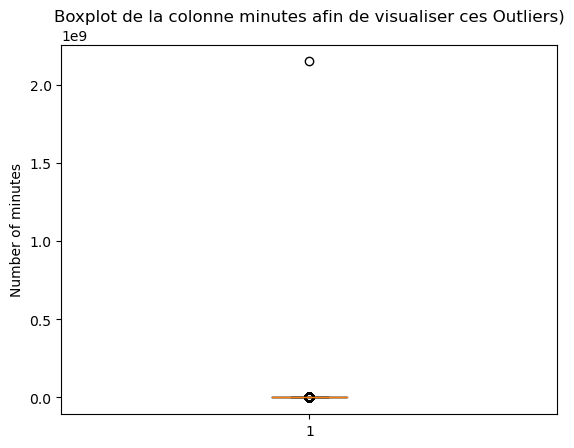

In [14]:
# Visualisation of these outliers 

# Création d'un boxplot pour visualiser les outliers de la colonne 'minutes'
plt.boxplot(recipe['minutes'])
plt.ylabel('Number of minutes')
plt.title('Boxplot de la colonne minutes afin de visualiser ces Outliers)')
plt.show()


In [15]:
# Checking the rows with 0 min but no 15-minutes-or-less tags 
no_tag_0_recipe = recipe[(recipe['minutes'] == 0) & (~recipe['tags'].str.contains("15-minutes-or-less", na=False))]
no_tag_0_recipe.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients


In [16]:
# Toutes les recettes où min = 0 ont le tag. Appliquons notre technique.

def replace_minutes(row):
    if row['minutes'] == 0 and "15-minutes-or-less" in row['tags']:
            return np.random.randint(1, 16)
    return row['minutes']
        
recipe['minutes'] = recipe.apply(replace_minutes, axis=1)
        
recipe.loc[recipe['minutes'] == recipe['minutes'].min()].head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
264,red robin drink recipe mai tai,175306,1,329471,2006-06-28,"['15-minutes-or-less', 'time-to-make', 'course...","[160.9, 0.0, 46.0, 0.0, 0.0, 0.0, 5.0]",6,['add grenadine and orgeat into a bottom of gl...,tropical mai tai from \r\nred robin gourmet bu...,"['grenadine', 'orgeat syrup', 'white rum', 'or...",9
572,weight watchers ice cream sandwiches del,279176,1,555701,2008-01-15,"['15-minutes-or-less', 'time-to-make', 'course...","[46.8, 4.0, 20.0, 0.0, 1.0, 10.0, 1.0]",7,"['break graham cracker in half', 'spread fruit...","these are soooooooo good, low cal, can be made...","['chocolate graham cracker', 'cool whip lite',...",4
713,tasty s hidden mickey surprise snack,362654,1,47892,2009-03-24,"['celebrity', '15-minutes-or-less', 'time-to-m...","[23.8, 0.0, 11.0, 0.0, 2.0, 0.0, 1.0]",6,['slice into a bell pepper crosswise and see i...,mommy discovered this little trick last year: ...,"['bell pepper', 'ranch dressing', 'salt and pe...",5
808,10 carb mocha,168663,1,318709,2006-05-19,"['15-minutes-or-less', 'time-to-make', 'course...","[41.4, 5.0, 0.0, 0.0, 2.0, 10.0, 0.0]",2,"['combine the above', ""this can be easily made...",this is a fastest low-carb mocha you can make ...,"['brewed coffee', 'half-and-half', 'nesquik no...",3
842,10 second mango yogurt smoothie,423880,1,593927,2010-05-07,"['weeknight', '15-minutes-or-less', 'time-to-m...","[112.1, 9.0, 34.0, 3.0, 12.0, 19.0, 2.0]",3,['wizz together in blender adding more of eith...,this is very quick so make it if that is what ...,"['mango nectar', 'plain yogurt']",2


In [17]:
# Identifier l'index de la ligne avec la valeur maximale dans la colonne 'minutes'
index_max = recipe['minutes'].idxmax()

# Supprimer la ligne avec la valeur maximale (pas besoin de copier le df)
recipe = recipe.drop(index_max)

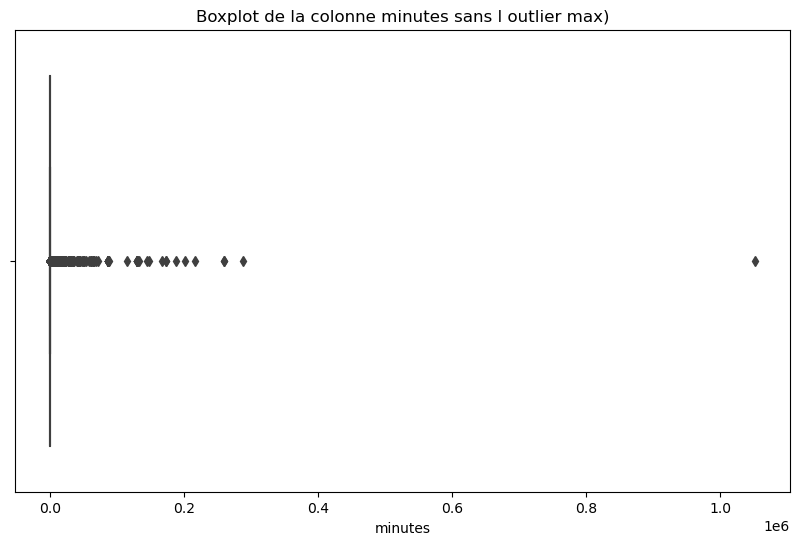

In [18]:
# Visualisons à nouveau avec le boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=recipe['minutes'])

plt.title('Boxplot de la colonne minutes sans l outlier max)')
plt.show()


In [19]:
# Regardons à nouveau le max

max2_value_minutes = recipe['minutes'].max()

recipe.loc[recipe['minutes'] == max2_value_minutes]


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...","['cream', 'peach']",2


In [20]:
# On va supprimer cette nouvelle valeur abérrante
index_max2 = recipe['minutes'].idxmax()

# Supprimer la ligne avec la valeur maximale (pas besoin de copier le df)
recipe_woa = recipe.drop(index_max2)

In [21]:
# Check the new size 
print(recipe_woa.shape)

(231635, 12)


In [22]:
# Let's select only the rows corresponding to a number of min greater than 1 month
time_month = 30*24*60
recipe_woa.loc[recipe['minutes']>time_month].head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5497,angelica liqueur,70551,201610,59064,2003-09-04,"['weeknight', 'time-to-make', 'course', 'cuisi...","[891.8, 0.0, 906.0, 0.0, 1.0, 0.0, 76.0]",7,"['crush the fennel , aniseed , coriander seeds...",finish off a large meal with a tiny glass of t...,"['fennel seed', 'anise seed', 'coriander seeds...",7
6545,apple cinnamon liqueur,236379,129615,327115,2007-06-21,"['time-to-make', 'course', 'preparation', 'low...","[4.2, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]",7,"['in a quart jar , add apple , cinnamon sticks...",this is amazing. a really nice amber color an...,"['granny smith apple', 'cinnamon sticks', 'vod...",6
8529,armenian basterma dried cured beef,21584,47520,29203,2002-03-05,"['weeknight', 'time-to-make', 'course', 'main-...","[5.3, 0.0, 0.0, 102.0, 0.0, 0.0, 0.0]",12,['select very tender cut of beef from rib part...,this is armenian cured spiced beef. it is a wo...,"['beef', 'salt', 'chaimen', 'paprika', 'red pe...",10
12124,bachelor s brandy,41404,86400,21752,2002-09-30,"['weeknight', 'time-to-make', 'course', 'main-...","[2716.0, 1.0, 266.0, 0.0, 14.0, 0.0, 62.0]",8,['place the berries in a 1 quart glass contain...,a great way to bring the summer fruits into th...,"['mixed berries', 'granulated sugar', 'vanilla...",4
21938,berry cordial,102098,43380,31807,2004-10-15,"['time-to-make', 'course', 'preparation', 'for...","[185.8, 0.0, 111.0, 0.0, 1.0, 0.0, 10.0]",14,"['put berries in a 6-8qt pot and add water', '...",a recipe from my friend roy heflin. note that ...,"['blackberries', 'water', 'sugar', 'vodka']",4
24807,blackberry brandy,147401,86410,151325,2005-12-05,"['time-to-make', 'course', 'main-ingredient', ...","[3849.8, 3.0, 994.0, 0.0, 12.0, 0.0, 90.0]",8,['divide the blackberries between 3 sterilised...,last summer was a wonderful year for blackberr...,"['blackberry', 'superfine sugar', 'brandy']",3
26124,blueberry liqueur,236281,129615,327115,2007-06-21,"['time-to-make', 'course', 'preparation', 'low...","[4.2, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]",7,"['in a quart jar , blueberries , 1 cup sugar ,...",this is an absolutely beautiful shade of purpl...,"['blueberries', 'vodka', 'sugar', 'water', 'gl...",5
27153,bouillon bbq onions,95215,86410,13483,2004-07-07,"['time-to-make', 'course', 'main-ingredient', ...","[138.7, 18.0, 14.0, 18.0, 2.0, 36.0, 2.0]",8,"['peel outer layer off onions', 'slice a secti...",if there is room on your grill you might want ...,"['onions', 'chicken bouillon cubes', 'butter']",3
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","['gingerroot', 'lemons, juice and rind of', 'w...",7
41240,cherry bounce a cordial,41402,86400,21752,2002-09-30,"['weeknight', 'time-to-make', 'course', 'main-...","[2408.7, 0.0, 414.0, 0.0, 6.0, 0.0, 37.0]",8,['place the cherries in a 1 quart glass contai...,sweet liqueurs made with seasonal fruit -- get...,"['fresh cherries', 'granulated sugar', 'lemon'...",4


In [23]:
recipe_woa.loc[recipe_woa['minutes'] == recipe_woa['minutes'].max()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3


In [24]:
# En cas de removal :

# idx = recipe.index[recipe['minutes'] > time_month].tolist()
# Then remove the row using the list of indices
# recipe_woa = recipe.drop(idx)
# print("In total, we removed {} observations considered as outliers".format(recipe.shape[0]-recipe_woa.shape[0]))

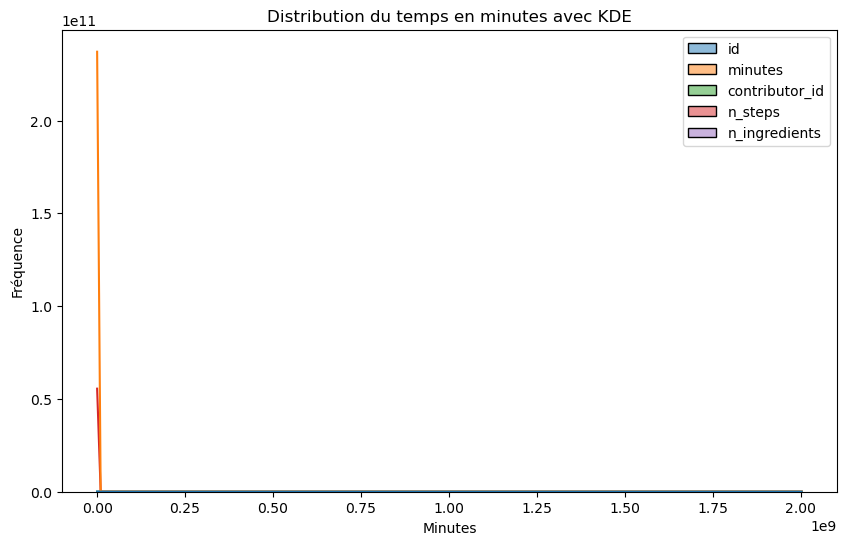

In [25]:
# Vérifions la nouvelle distribution de la colonne minutes.

plt.figure(figsize=(10,6))
sns.histplot(recipe_woa.loc[recipe['minutes']<time_month], kde=True, bins=10)
plt.xlabel('Minutes')
plt.ylabel('Fréquence')
plt.title('Distribution du temps en minutes avec KDE')
plt.show()

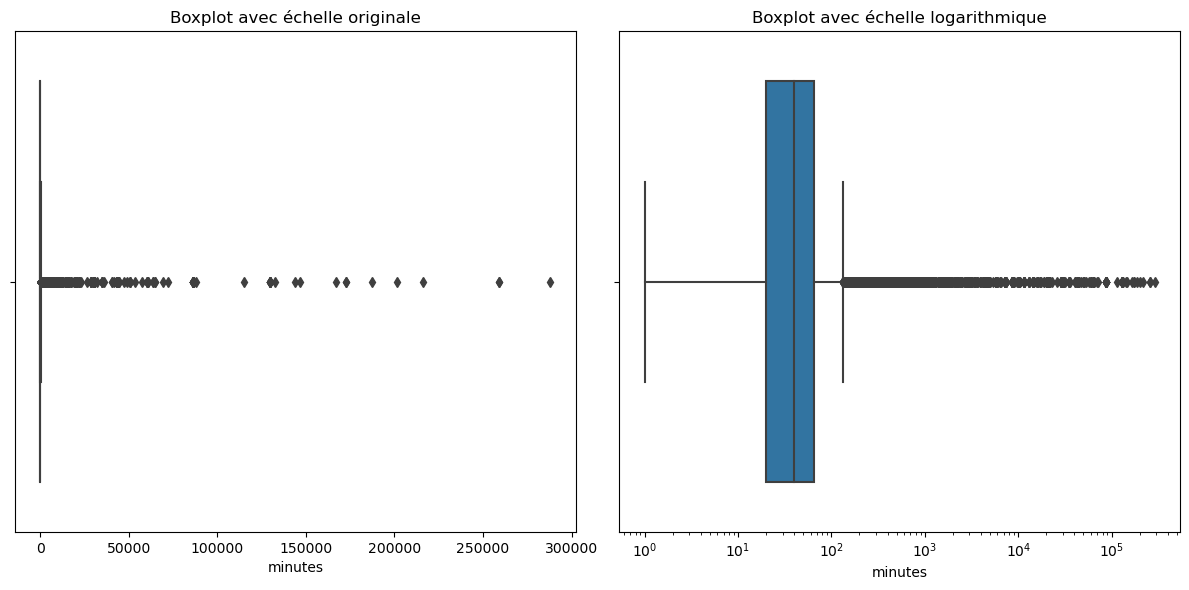

In [26]:
# Créer la figure et les sous-graphiques (subplots)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot original (sans transformation)
sns.boxplot(x=recipe_woa['minutes'], ax=axes[0])
axes[0].set_title('Boxplot avec échelle originale')

# Boxplot avec une échelle logarithmique (valeurs filtrées)
sns.boxplot(x=recipe_woa['minutes'], ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Boxplot avec échelle logarithmique')

# Afficher les deux sous-graphiques
plt.tight_layout()
plt.show()

In [27]:
# Calculer le premier quartile (Q1)
Q1 = recipe_woa['minutes'].quantile(0.25)

# Calculer la médiane (Q2)
median = recipe_woa['minutes'].median()

# Calculer le troisième quartile (Q3)
Q3 = recipe_woa['minutes'].quantile(0.75)

# Afficher les valeurs
print(f"Premier quartile (Q1) : {Q1}")
print(f"Médiane : {median}")
print(f"Troisième quartile (Q3) : {Q3}")

Premier quartile (Q1) : 20.0
Médiane : 40.0
Troisième quartile (Q3) : 65.0


In [28]:
# Recalculons la moyenne :
moyenne = recipe_woa['minutes'].mean()
print(f" Nouvelle moyenne : {moyenne}")

 Nouvelle moyenne : 123.14564724674595


La moyenne est toujours trop sensible aux outliers.
50% des recettes prennent moins de 40 minutes. Alors que la moyenne est de 123 minutes.
La moyenne n'est dont pas adaptée pour discerner une tendance centrale.
Aussi 25% des recettes prennent moins de 20 min et 25% plus d'une heure.

On a retiré 2 observations pour le moment : les deux outliers maximum incohérents, semblant être des erreurs de saisie ou des blagues...

On remarque une asymétrie vers la gauche dans la distribution. Ce qui semble cohérent vu qu'on parle de recettes de cuisine...

In [29]:
recipe_woa.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [30]:
recipe_woa.describe()
# Id et Contributor_id make no sense ici. 
# Il va falloir rendre ces variables catégoriques lorsque nous gérerons les variables catégoriques

,id,minutes,contributor_id,n_steps,n_ingredients
count,231635.000000,231635.000000,2.316350e+05,231635.000000,231635.000000
mean,222013.562437,123.145647,5.534928e+06,9.765506,9.051188
std,141206.440797,1977.765667,9.979184e+07,5.995153,3.734782
min,38.000000,1.000000,2.700000e+01,0.000000,1.000000
25%,99943.500000,20.000000,5.690500e+04,6.000000,6.000000
50%,207248.000000,40.000000,1.736140e+05,9.000000,9.000000
75%,333815.500000,65.000000,3.982750e+05,12.000000,11.000000
max,537716.000000,288000.000000,2.002290e+09,145.000000,43.000000


Démarrons avec les autres variables numériques : n_steps et n_ingrédients 
Vérifions s'il existe une relation linéaire entre le n_steps et minutes (make sense).

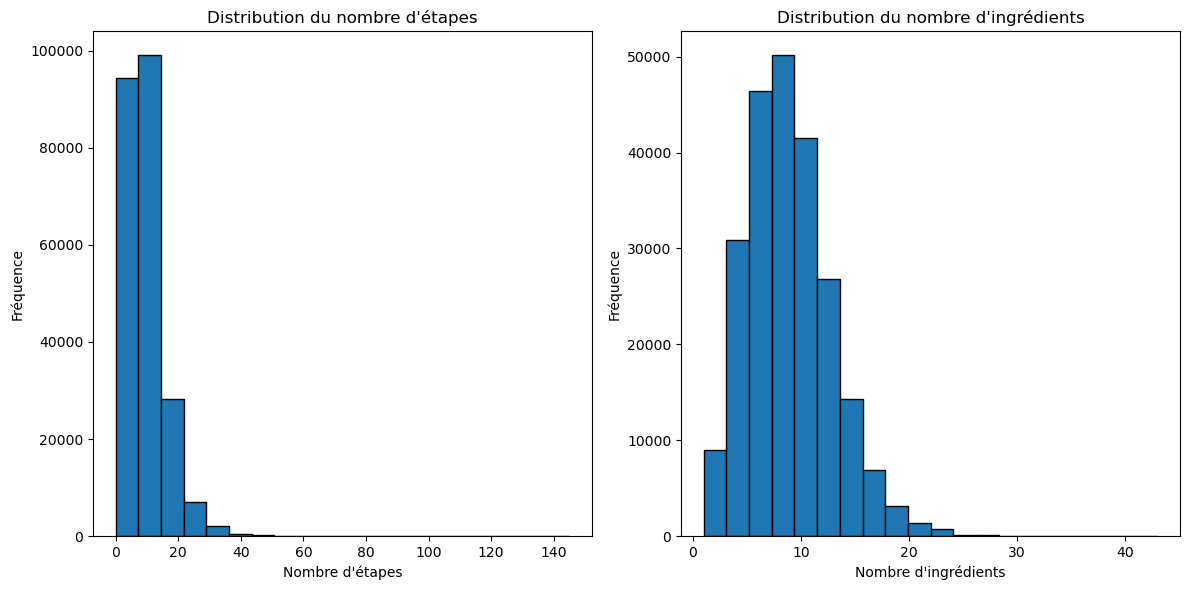

In [31]:
# Vérifions d'abord la distribution de ces colonnes

# Créer les histogrammes
plt.figure(figsize=(12, 6))

# Histogramme pour le nombre d'étapes
plt.subplot(1, 2, 1)
plt.hist(recipe_woa['n_steps'], bins=20, edgecolor='black')
plt.title('Distribution du nombre d\'étapes')
plt.xlabel('Nombre d\'étapes')
plt.ylabel('Fréquence')

# Histogramme pour le nombre d'ingrédients
plt.subplot(1, 2, 2)
plt.hist(recipe_woa['n_ingredients'], bins=20, edgecolor='black')
plt.title('Distribution du nombre d\'ingrédients')
plt.xlabel('Nombre d\'ingrédients')
plt.ylabel('Fréquence')

# Afficher les graphiques
plt.tight_layout()
plt.show()

On observe une asymétrie vers la gauche, similaire à celle de la colonne minutes. Générons les boxplots pour ces deux variables.

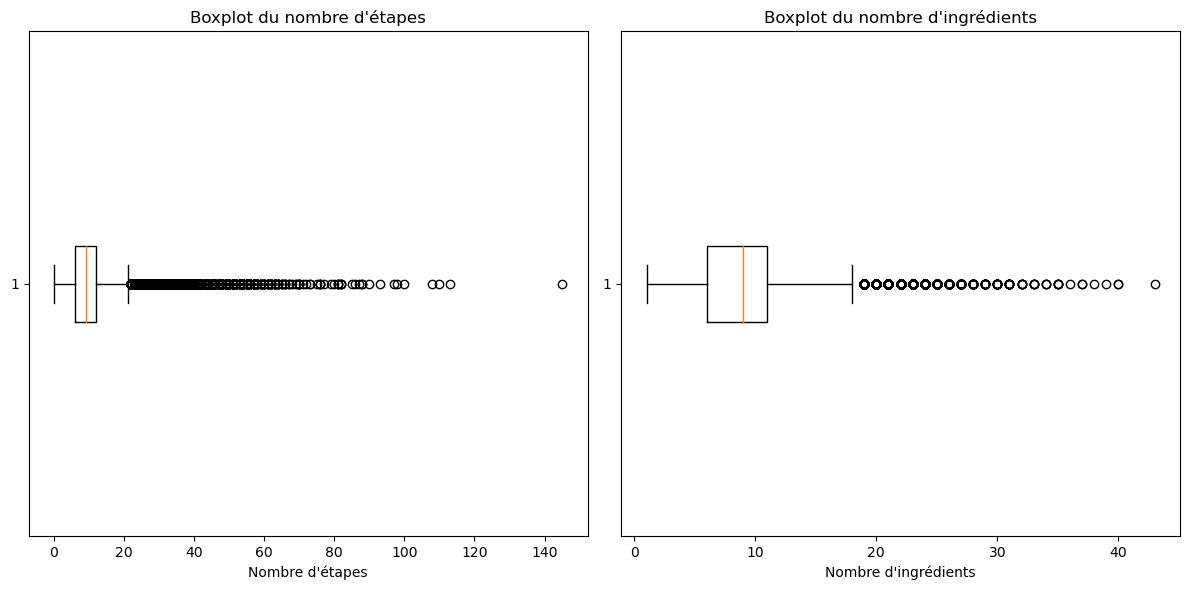

In [32]:
# Créer les boxplots
plt.figure(figsize=(12, 6))

# Boxplot pour le nombre d'étapes
plt.subplot(1, 2, 1)
plt.boxplot(recipe_woa['n_steps'], vert=False)
plt.title('Boxplot du nombre d\'étapes')
plt.xlabel('Nombre d\'étapes')

# Boxplot pour le nombre d'ingrédients
plt.subplot(1, 2, 2)
plt.boxplot(recipe_woa['n_ingredients'], vert=False)
plt.title('Boxplot du nombre d\'ingrédients')
plt.xlabel('Nombre d\'ingrédients')

# Afficher les graphiques
plt.tight_layout()
plt.show()

In [33]:
# On remarque des outliers. Vérifions les min et max pour le n_steps

max_value_steps = recipe_woa['n_steps'].max()
min_value_steps = recipe_woa['n_steps'].min()

print("les lignes correspondant aux valeurs minimum")
recipe_woa.loc[recipe_woa['n_steps'] == min_value_steps].head(5)

les lignes correspondant aux valeurs minimum


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
3381,all season bread,176767,90,331268,2006-07-10,"['time-to-make', 'course', 'main-ingredient', ...","[198.8, 11.0, 70.0, 18.0, 5.0, 5.0, 10.0]",0,[],just change the fruit/vegetable in this recipe...,"['flour', 'baking soda', 'salt', 'baking powde...",12


In [34]:
# Une seule valeur concernée, erreur de saisie, supprimons la ligne.

# pour aller plus loin : aller vérifier toutes les recettes rentrées par cet utilisateur

In [35]:
# Identifier l'index de la ligne avec la valeur maximale dans la colonne 'minutes'
index_min_steps = recipe_woa['n_steps'].idxmin()

# Supprimer la ligne avec la valeur maximale (pas besoin de copier le df)
recipe_woa = recipe_woa.drop(index_min_steps)

In [36]:
# Vérifions à nouveau le min:

min_value_steps2 = recipe_woa['n_steps'].min()
print("les lignes correspondant aux valeurs minimum après removal du 0")
recipe_woa.loc[recipe_woa['n_steps'] == min_value_steps2].head(5)

les lignes correspondant aux valeurs minimum après removal du 0


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
92,stove top bbq beef or pork ribs,83133,150,108291,2004-02-05,"['time-to-make', 'course', 'main-ingredient', ...","[179.3, 7.0, 119.0, 36.0, 3.0, 3.0, 11.0]",1,['cut all ribs into serving size pieces sprink...,this recipe is from the paula deen cooking sho...,"['beef ribs', 'onion', 'ketchup', 'water', 'fr...",10
249,outback steak rub,343448,5,751759,2008-12-14,"['15-minutes-or-less', 'time-to-make', 'main-i...","[6.6, 0.0, 0.0, 38.0, 0.0, 0.0, 0.0]",1,"['mix , sprinkle lightly on your favorite cut ...",a rub that tastes very similar to outback stea...,"['salt', 'paprika', 'ground black pepper', 'on...",8
328,berry good smoothie,28951,5,37636,2002-05-20,"['15-minutes-or-less', 'time-to-make', 'course...","[133.0, 1.0, 103.0, 0.0, 2.0, 0.0, 10.0]",1,['mix all ingredients in blender until smooth'],chock full of the comforting and down-home cou...,"['apple juice', 'strawberry', 'raspberries', '...",5
520,sexy sauce,181808,55,233182,2006-08-14,"['60-minutes-or-less', 'time-to-make', 'course...","[503.2, 2.0, 307.0, 121.0, 6.0, 1.0, 34.0]",1,"['whisk all ingredients together , bring to bo...",this is a barbecue sauce for steak originally ...,"['dry red wine', 'ketchup', 'dark molasses', '...",11
531,souped up veggie dip,358626,2,525142,2009-03-02,"['15-minutes-or-less', 'time-to-make', 'course...","[132.7, 18.0, 9.0, 16.0, 3.0, 35.0, 1.0]",1,['mix together and dip dip dip !'],"""souper"" fast and easy dip that always gets co...","['knorr vegetable soup mix', 'sour cream', 'ta...",3


In [37]:
print("les lignes correspondant aux valeurs maximum")
recipe_woa.loc[recipe_woa['n_steps'] == max_value_steps].head(5)

les lignes correspondant aux valeurs maximum


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
78633,easy yeast bread with variations,158120,210,182358,2006-02-28,"['time-to-make', 'course', 'preparation', 'hea...","[1784.5, 62.0, 104.0, 151.0, 103.0, 42.0, 99.0]",145,"['white bread:', 'lightly spooning flour into ...",found online in response to a request and now ...,"['all-purpose flour', 'dry yeast', 'sugar', 's...",8


In [38]:
# Erreur ou plusieurs recettes en une "with variations". On remove
index_max_steps = recipe_woa['n_steps'].idxmax()

# Supprimer la ligne avec la valeur maximale (pas besoin de copier le df)
recipe_woa = recipe_woa.drop(index_max_steps)

In [39]:
# Vérifions à nouveau le max:

max_value_steps2 = recipe_woa['n_steps'].max()
print("les lignes correspondant aux valeurs max après removal")
recipe_woa.loc[recipe_woa['n_steps'] == max_value_steps2].head(5)

les lignes correspondant aux valeurs max après removal


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
51528,chocolate raspberry mousse truffle cake rasp...,192468,240,232669,2006-10-27,"['time-to-make', 'course', 'main-ingredient', ...","[697.4, 57.0, 249.0, 9.0, 13.0, 105.0, 29.0]",113,"['make the chocolate sour cream cake:', 'prehe...","this recipe is the winner, hands down! just in...","['cake flour', 'baking soda', 'salt', 'godiva ...",24


In [40]:
# Identifier la ligne correspondant au maximum du nombre de steps
max_steps_row = recipe_woa.loc[recipe_woa['n_steps'].idxmax()]

# Afficher les colonnes 'description' et 'steps' pour cette ligne
print("Description:", max_steps_row['description'])
print("Steps:", max_steps_row['steps'])

Description: this recipe is the winner, hands down! just in case you want to know what it is that i'm saying -- this is the dessert that my friend judy chose for her very elegant dinner party. this is not easy at all! it's very involved but it is so worth it! i can't begin to tell you; takes 3 hours plus baking, cooling and chilling times. allow the truffle cake to chill overnight before serving. i am posting this for safe keeping.
can be made up to four days ahead of time.
Steps: ['make the chocolate sour cream cake:', 'preheat oven to 350f', 'lightly butter the bottom and sides of two 9x2" round cake pans', 'line the bottoms of the pans with parchment paper', 'dust the sides of the pans with flour and tap out the excess', 'sift together flour , baking soda and salt onto a piece of waxed paper', 'place chocolate in microwave-safe bowl', 'microwave on medium1 minute', 'stir', 'microwave 1 minute more or until chocolate softens', 'stir until smooth', 'let cool', 'beat butter and shorten

Il semblerait que l'utilisateur a eu un problème de saisie, peut-être de copier coller. Il y a des sauts de lignes au milieu de phrases. Or chaque saut de lignes compte comme une étape.

Passons aux ingrédients

In [41]:
max_value_ing = recipe_woa['n_ingredients'].max()
min_value_ing = recipe_woa['n_ingredients'].min()

print("les lignes correspondant aux valeurs minimum")
recipe_woa.loc[recipe_woa['n_ingredients'] == min_value_ing].head(5)

les lignes correspondant aux valeurs minimum


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
6499,apple cider reduction,521756,155,171084,2015-04-19,"['time-to-make', 'course', 'preparation', 'low...","[14.4, 0.0, 0.0, 8.0, 0.0, 0.0, 1.0]",13,"['in 6-8 quart stock pan , measure out 2 cups ...",i saw a post about this on facebook and gave i...,['apple cider'],1
13958,baked corn on the cob,434212,35,542159,2010-08-04,"['60-minutes-or-less', 'time-to-make', 'main-i...","[113.3, 2.0, 21.0, 0.0, 8.0, 1.0, 8.0]",2,"['in an oven heated at 350 f , cook corn in hu...",one of my neighbors was telling me this is her...,['corn'],1
49173,chocolate dirt,425260,5,730126,2010-05-13,"['15-minutes-or-less', 'time-to-make', 'course...","[201.2, 19.0, 91.0, 0.0, 3.0, 37.0, 8.0]",3,"['place chips in a coffee grinder', 'grind unt...","this chocolate ""dirt"" is perfect for dusting c...",['dark chocolate chips'],1
55087,clotted cream,9043,900,6258,2001-05-19,"['weeknight', 'time-to-make', 'cuisine', 'prep...","[410.6, 67.0, 0.0, 1.0, 4.0, 137.0, 1.0]",6,['cook cream in top of double boiler over simm...,this recipe comes close to the real thing.,['heavy cream'],1
74549,easter hard boiled eggs,354371,12,1119236,2009-02-06,"['15-minutes-or-less', 'time-to-make', 'course...","[68.9, 7.0, 0.0, 2.0, 12.0, 7.0, 0.0]",9,['place the eggs in a pot with enough cold sal...,"a gruszecki tradition and now ours, is that ea...",['egg'],1


In [42]:
# Rien d'anormal. Et le max ?

In [43]:
print("les lignes correspondant aux valeurs maximum")
recipe_woa.loc[recipe_woa['n_ingredients'] == max_value_ing].head(5)

les lignes correspondant aux valeurs maximum


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
2162,a to z bread,3748,80,1535,1999-10-30,"['time-to-make', 'course', 'main-ingredient', ...","[367.0, 30.0, 101.0, 10.0, 9.0, 12.0, 14.0]",12,"['in a mixing bowl , combine the sugar , oil a...",an extremely versatile bread. very moist and d...,"['sugar', 'vegetable oil', 'eggs', 'vanilla ex...",43


In [44]:
# Regardons de plus près
max_steps_row_ing = recipe_woa.loc[recipe_woa['n_ingredients'].idxmax()]

# Afficher les colonnes 'description' et 'steps' pour cette ligne
print("Ingrédients:", max_steps_row_ing['ingredients'])

Ingrédients: ['sugar', 'vegetable oil', 'eggs', 'vanilla extract', 'all-purpose flour', 'cinnamon', 'baking powder', 'baking soda', 'salt', 'walnuts', 'apples', 'applesauce', 'apricots', 'bananas', 'carrots', 'cherries', 'fresh coconut', 'dates', 'eggplants', 'figs', 'seedless grapes', 'honey', 'lemon juice', 'marmalade', 'mincemeat', 'oranges', 'peaches', 'of fresh mint', 'pears', 'crushed pineapple', 'prune', 'canned pumpkin', 'raisins', 'raspberries', 'rhubarb', 'fresh strawberries', 'frozen strawberries', 'sweet potatoes', 'tapioca', 'tomatoes', 'yams', 'yogurt', 'zucchini']


Let's take a closer look at the ingredients variables. 
My research questions: how many unique ingredients and what is the top-5 of used ingredients. 

In [45]:
# Ingredients 
import ast

l_ingredient = list(recipe_woa.ingredients)
list_ingredient = []
for item in l_ingredient: 
    item = ast.literal_eval(item)
    for i in item: 
        list_ingredient.append(i)

In [46]:
print('There are {} unique ingredients'.format(len(set(list_ingredient))))

There are 14942 unique ingredients


In [47]:
from collections import Counter

element_counts = Counter(list_ingredient)
top_ten = element_counts.most_common(10)
print(top_ten)

[('salt', 85744), ('butter', 54975), ('sugar', 44534), ('onion', 39065), ('water', 34913), ('eggs', 33759), ('olive oil', 32822), ('flour', 26265), ('milk', 25785), ('garlic cloves', 25748)]


In [48]:
least_ten = element_counts.most_common()[:-10-1:-1]
print(least_ten)

[('nepitella', 1), ('skinless halibut fillet', 1), ("hunt's fire roasted diced tomatoes", 1), ('rosarita premium whole black beans', 1), ('apricot jell-o', 1), ('seasoned rice vinegar with roasted garlic', 1), ('roasted red pepper pesto', 1), ('pesto garlic tortillas', 1), ('thousand island sandwich spread', 1), ('low-fat low-sodium condensed cream of tomato soup', 1)]


In [49]:
# Let's check the colinearity between minutes, n_steps and n_ingredients

# Calculer la matrice de corrélation
correlation_matrix = recipe_woa[['minutes', 'n_steps', 'n_ingredients']].corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

                minutes   n_steps  n_ingredients
minutes        1.000000  0.018198      -0.012103
n_steps        0.018198  1.000000       0.428213
n_ingredients -0.012103  0.428213       1.000000


n_steps et n_ingredients sont légèrement corrélées positivement (n_steps augmente --> n_ingredient augmente). 
Mais pas de corrélation avec minutes. Nous ne sommes donc pas dans un cas de multicolinéarité. 

In [50]:
recipe_woa.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


Let's handle the id columns. There are numerical and we want to make them categorical

In [51]:
recipe_woa['contributor_id'] = recipe_woa.contributor_id.astype('category')
recipe_woa['id'] = recipe_woa.id.astype('category')

In [52]:
# How many unique contributors are there?

print(len(set(recipe['contributor_id'])))

27926


In [53]:
# Count the number of recipes per contributor_id 
count_recipe = recipe_woa['contributor_id'].value_counts()
print(count_recipe.head())

contributor_id
89831    3118
37779    2553
37449    2493
1533     1595
58104    1522
Name: count, dtype: int64


In [54]:
print("User with the id {} contributed the most with {} recipes ".format(count_recipe.idxmax(),
                                                                         count_recipe.max()))
print("User with the id {} contributed the least with {} recipes ".format(count_recipe.idxmin(),
                                                                         count_recipe.min()))

User with the id 89831 contributed the most with 3118 recipes 
User with the id 770164 contributed the least with 1 recipes 


In [55]:
# VERIFIER LE NB D'UTILISATEURS AVEC UNE SEULE RECETTE

In [56]:
print("User with the id {} contributed the most with {}% of the recipes ".format(count_recipe.idxmax(),
                                                                         (round(count_recipe.max()/recipe_woa.shape[0]*100,2))))

User with the id 89831 contributed the most with 1.35% of the recipes 


In [57]:
print("The average number of contribution per user is {}".format(round(count_recipe.mean())))

The average number of contribution per user is 8


Nutrition Score
We propose to convert the nutrition score to one column for each score.

In [58]:
## Nutrition score processing

recipe_woa[['calories','total fat (%)','sugar (%)','sodium (%)','protein (%)','saturated fat (%)','carbohydrates (%)']] = recipe_woa.nutrition.str.split(",",expand=True)
recipe_woa['calories'] = recipe_woa['calories'].apply(lambda x: x.replace('[','')) 
recipe_woa['carbohydrates (%)']= recipe_woa['carbohydrates (%)'].apply(lambda x: x.replace(']','')) 


In [59]:
recipe_woa.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [60]:
recipe_woa[['calories','total fat (%)','sugar (%)','sodium (%)','protein (%)','saturated fat (%)','carbohydrates (%)']]=recipe_woa[['calories','total fat (%)','sugar (%)','sodium (%)','protein (%)','saturated fat (%)','carbohydrates (%)']].astype(float)
recipe_woa.describe()

,minutes,n_steps,n_ingredients,calories,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
count,231633.000000,231633.000000,231633.000000,231633.000000,231633.000000,231633.000000,231633.000000,231633.000000,231633.000000,231633.000000
mean,123.145415,9.764964,9.051180,473.938862,36.080662,84.296879,30.147254,34.681898,45.589135,15.560114
std,1977.774196,5.988557,3.734793,1189.718348,77.799459,800.087799,131.962462,58.472738,98.236454,81.825079
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,6.000000,6.000000,174.300000,8.000000,9.000000,5.000000,7.000000,7.000000,4.000000
50%,40.000000,9.000000,9.000000,313.400000,20.000000,25.000000,14.000000,18.000000,23.000000,9.000000
75%,65.000000,12.000000,11.000000,519.700000,41.000000,68.000000,33.000000,51.000000,52.000000,16.000000
max,288000.000000,113.000000,43.000000,434360.200000,17183.000000,362729.000000,29338.000000,6552.000000,10395.000000,36098.000000


<Axes: xlabel='calories'>

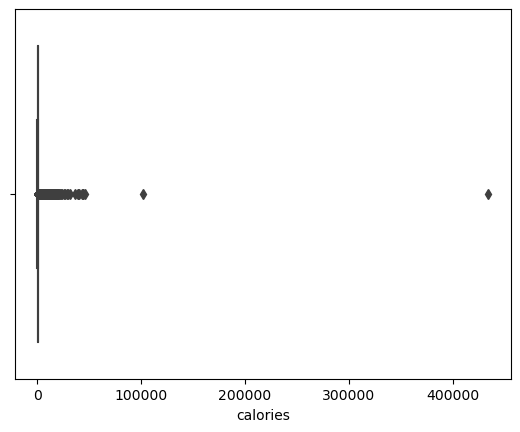

In [61]:
sns.boxplot(data=recipe_woa, x='calories')
# des outliers à cleaner dans les col nutrition

<Axes: xlabel='total fat (%)'>

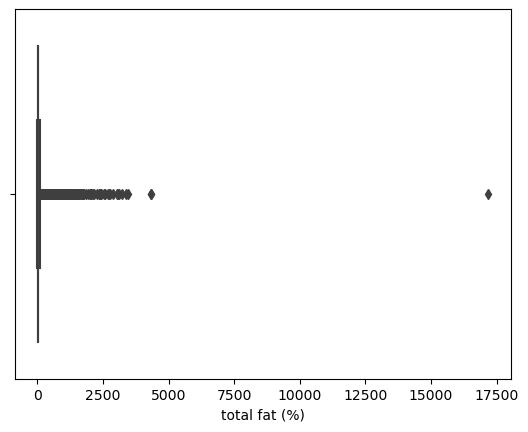

In [62]:
sns.boxplot(data=recipe_woa, x='total fat (%)')

In [63]:
# Let's check the max row

max_value_cal = recipe_woa['calories'].max()
max_value_fat = recipe_woa['total fat (%)'].max()

print("les lignes correspondant aux valeurs max de la variable calorie")
recipe_woa.loc[recipe_woa['calories'] == max_value_cal].head()


les lignes correspondant aux valeurs max de la variable calorie


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
209453,tennessee moonshine,193435,20,374913,2006-11-01,"['30-minutes-or-less', 'time-to-make', 'course...","[434360.2, 1293.0, 362729.0, 1324.0, 3961.0, 5...",3,['to boiled cornmeal add yeast and lots of sug...,common moonshine recipe in tennessee,"['cornmeal', 'natural bran', 'sugar', 'yeast',...",5,434360.2,1293.0,362729.0,1324.0,3961.0,590.0,36098.0


In [64]:
# Identifier la ligne correspondant au maximum du nombre de steps
max_steps = recipe_woa.loc[recipe_woa['calories'].idxmax()]

# Afficher les colonnes 'description' et 'steps' pour cette ligne
print("Description:", max_steps['description'])
print("Steps:", max_steps['steps'])

Description: common moonshine recipe in tennessee
Steps: ['to boiled cornmeal add yeast and lots of sugar', 'let the mash ferment', 'once fermented cook the mash']


In [65]:
recipe_woa.loc[recipe_woa['total fat (%)'] == max_value_fat].head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
70467,deep fried prime rib,227470,100,485396,2007-05-11,"['time-to-make', 'course', 'main-ingredient', ...","[101614.7, 17183.0, 0.0, 230.0, 1271.0, 10395....",12,['the night before you plan to serve your prim...,this makes the juicest and best flavored prime...,"['boneless rib-eye roast', 'peanut oil', 'grou...",6,101614.7,17183.0,0.0,230.0,1271.0,10395.0,1.0


In [66]:
# Elles semblent être des erreurs car très dispersées par rapport au reste du dataset. On supprime

index_max_cal = recipe_woa['calories'].idxmax()
index_max_fat = recipe_woa['total fat (%)'].idxmax()

# Supprimer les ligne avec ces valeurs maximales (pas besoin de copier le df)
recipe_woa = recipe_woa.drop(index_max_cal)
recipe_woa = recipe_woa.drop(index_max_fat)

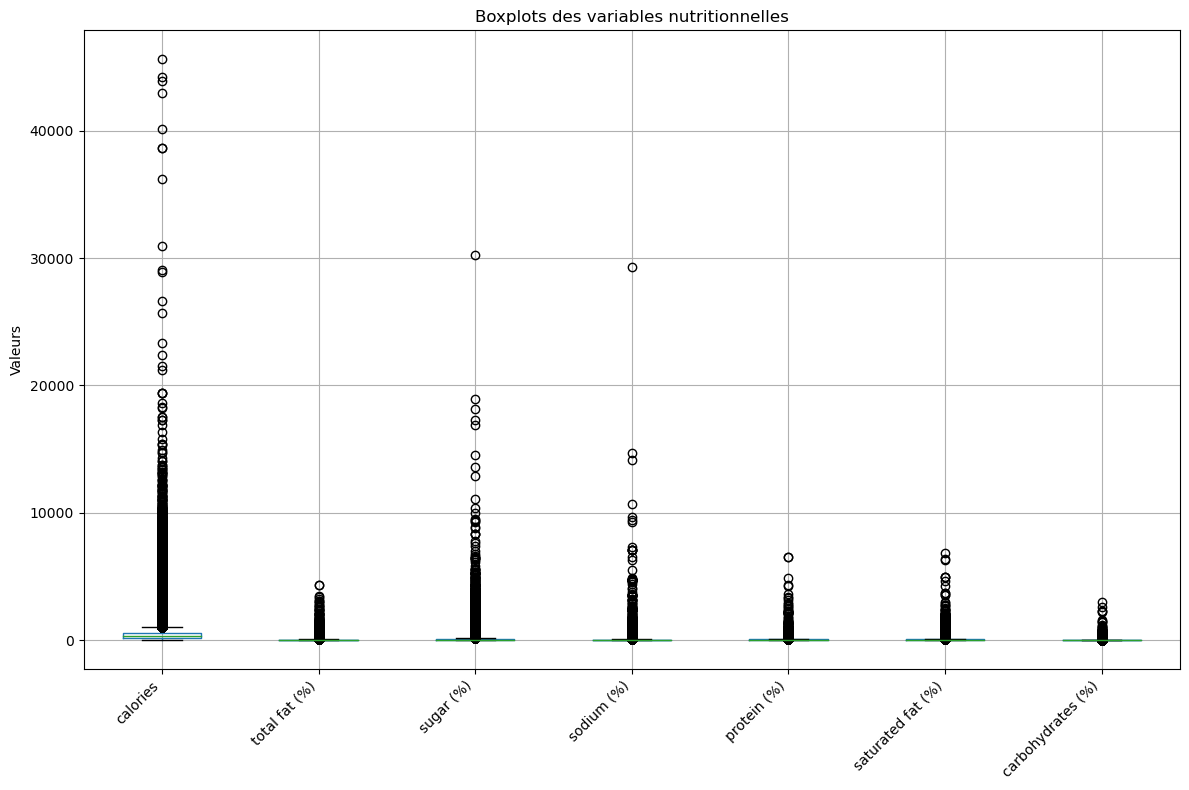

In [67]:
# Boxplot pour toutes les variables nutritionnelles

# Liste des colonnes pour lesquelles nous voulons générer des boxplots
columns_to_plot = ['calories', 'total fat (%)', 'sugar (%)', 'sodium (%)', 'protein (%)', 'saturated fat (%)', 'carbohydrates (%)']

# Créer les boxplots
plt.figure(figsize=(12, 8))

# Générer un boxplot pour chaque variable dans la liste
recipe_woa[columns_to_plot].boxplot()

# Ajouter un titre et labels
plt.title('Boxplots des variables nutritionnelles')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Valeurs')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [68]:
# Filtrer les lignes où 'calories' est supérieur à 10000, valeur anormalement élevée
calories_elevees = recipe_woa[recipe_woa['calories'] > 10000]

# Compter le nombre de lignes correspondantes
nombre_lignes_calories_elevees = calories_elevees.shape[0]

print(f"Nombre de lignes avec des calories supérieures à 10000 : {nombre_lignes_calories_elevees}")

Nombre de lignes avec des calories supérieures à 10000 : 123


In [69]:
calories_elevees.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
931,14 day unsealed pickles,17490,20160,28533,2002-01-19,"['weeknight', 'time-to-make', 'course', 'prepa...","[13465.2, 5.0, 12914.0, 14152.0, 42.0, 5.0, 10...",17,['1st day: dissolve salt in 1 gallon boiling w...,this is not my recipe. found it on key gourmet...,"['cucumbers', 'canning salt', 'vinegar', 'alum...",6,13465.2,5.0,12914.0,14152.0,42.0,5.0,1098.0
3224,algerian khobz el dar semolina bread,387136,155,510313,2009-08-25,"['time-to-make', 'course', 'main-ingredient', ...","[18656.0, 2770.0, 36.0, 198.0, 215.0, 1186.0, ...",17,"['grease a large round metal tin / pan', 'plac...",this is the traditional bread of every home in...,"['fine semolina', 'white bread flour', 'water'...",11,18656.0,2770.0,36.0,198.0,215.0,1186.0,187.0
4252,alternate honey barbecue sauce with riblets a...,338356,225,1027769,2008-11-19,"['time-to-make', 'course', 'main-ingredient', ...","[21497.8, 2373.0, 257.0, 371.0, 3605.0, 2731.0...",16,"['preparing the riblets: first , season the ri...",this is a recipe i originally found in the rec...,"['ketchup', 'corn syrup', 'honey', 'apple cide...",12,21497.8,2373.0,257.0,371.0,3605.0,2731.0,29.0
7839,applesauce fruitcake,185566,90,20395,2006-09-11,"['time-to-make', 'course', 'main-ingredient', ...","[11921.5, 581.0, 6098.0, 199.0, 242.0, 353.0, ...",4,['combine all ingredients except fruits and nu...,never mind all the jokes about nobody really e...,"['sugar', 'shortening', 'unsweetened applesauc...",18,11921.5,581.0,6098.0,199.0,242.0,353.0,711.0
10815,authentic mrs fields chocolate chip cookies,83777,25,42559,2004-02-12,"['30-minutes-or-less', 'time-to-make', 'course...","[14681.5, 1061.0, 5294.0, 531.0, 360.0, 2037.0...",7,"['cream together butter , sugar and brown suga...",this is the closest thing i've ever tasted to ...,"['butter', 'sugar', 'brown sugar', 'eggs', 'va...",13,14681.5,1061.0,5294.0,531.0,360.0,2037.0,688.0


In [70]:
# Liste des colonnes en pourcentage
pourcentage_colonnes = ['total fat (%)','sugar (%)','sodium (%)','protein (%)','saturated fat (%)','carbohydrates (%)']

# Création de la condition > 1000% 
condition = recipe_woa[pourcentage_colonnes].gt(1000).any(axis=1)

# Nombre de lignes avec un % supérieur à 100%
nombre_lignes_sup1000 = condition.sum()
print(f"Nombre de lignes avec un % supérieur à 100% : {nombre_lignes_sup1000}")

Nombre de lignes avec un % supérieur à 100% : 3225


                    minutes   n_steps  n_ingredients  calories  total fat (%)  \
minutes            1.000000  0.018197      -0.012103  0.033256      -0.000432   
n_steps            0.018197  1.000000       0.428213  0.119066       0.104933   
n_ingredients     -0.012103  0.428213       1.000000  0.100991       0.089576   
calories           0.033256  0.119066       0.100991  1.000000       0.885132   
total fat (%)     -0.000432  0.104933       0.089576  0.885132       1.000000   
sugar (%)          0.053662  0.047902      -0.002844  0.713494       0.445676   
sodium (%)         0.023626  0.015711       0.037124  0.246066       0.172964   
protein (%)        0.000506  0.114405       0.159863  0.600846       0.551364   
saturated fat (%) -0.002339  0.116109       0.062260  0.817141       0.888478   
carbohydrates (%)  0.036102  0.088209       0.057489  0.834639       0.520845   

                   sugar (%)  sodium (%)  protein (%)  saturated fat (%)  \
minutes             0.053662    

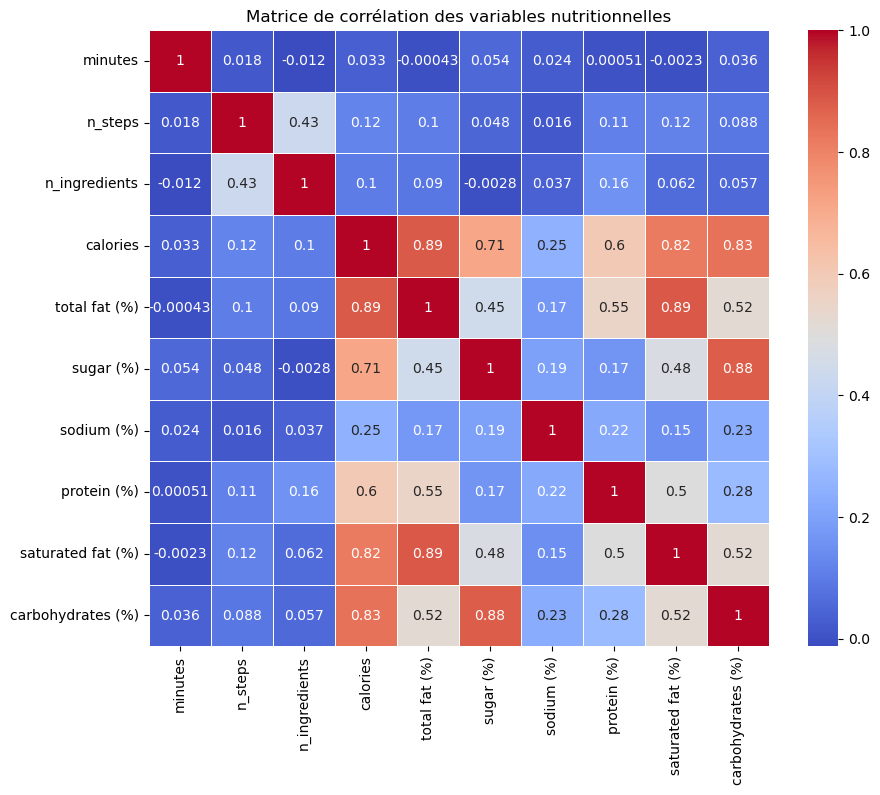

In [71]:
# Analysons la corrélation entre ces variables nutritionnelles

columns_to_analyze = ['minutes','n_steps','n_ingredients','calories', 'total fat (%)', 'sugar (%)', 'sodium (%)', 'protein (%)', 'saturated fat (%)', 'carbohydrates (%)']

# Calculer la matrice de corrélation
correlation_matrix2 = recipe_woa[columns_to_analyze].corr()

# Afficher la matrice de corrélation
print(correlation_matrix2)

# Visualiser la matrice de corrélation avec une heatmap pour mieux interpréter
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation des variables nutritionnelles')
plt.show()

In [72]:
recipe_woa.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%)
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [73]:
# Convertir la variabel au format datetime
recipe_woa['submitted'] = pd.to_datetime(recipe_woa['submitted'], errors='coerce')

In [74]:
# Extraire l'année, le mois, le jour de la semaine, etc.
recipe_woa['year'] = recipe_woa['submitted'].dt.year
recipe_woa['month'] = recipe_woa['submitted'].dt.month
recipe_woa['day'] = recipe_woa['submitted'].dt.day
recipe_woa['day_of_week'] = recipe_woa['submitted'].dt.day_name()

recipe_woa.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),year,month,day,day_of_week
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,13.0,0.0,2.0,0.0,4.0,2005,9,16,Friday
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,18.0,0.0,17.0,22.0,35.0,1.0,2002,6,17,Monday
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,22.0,32.0,48.0,39.0,27.0,5.0,2005,2,25,Friday
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,17.0,10.0,2.0,14.0,8.0,20.0,2003,4,14,Monday
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,...,1.0,337.0,23.0,3.0,0.0,28.0,2002,10,25,Friday


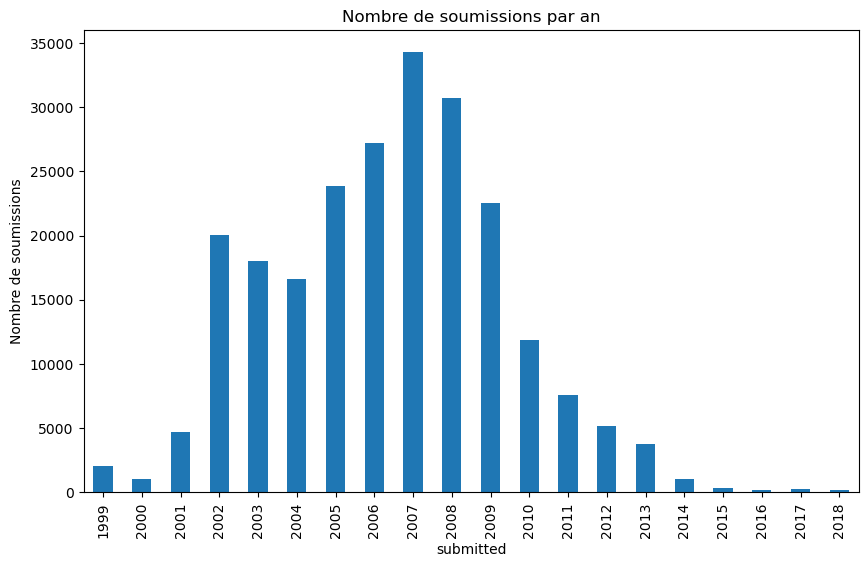

In [75]:
# Grouper par mois et compter le nombre de soumissions
submissions_per_year = recipe_woa.groupby(recipe_woa['submitted'].dt.to_period('Y')).size()

# Visualiser les soumissions par mois
submissions_per_year.plot(kind='bar', figsize=(10, 6), title='Nombre de soumissions par an')
plt.ylabel('Nombre de soumissions')
plt.show()

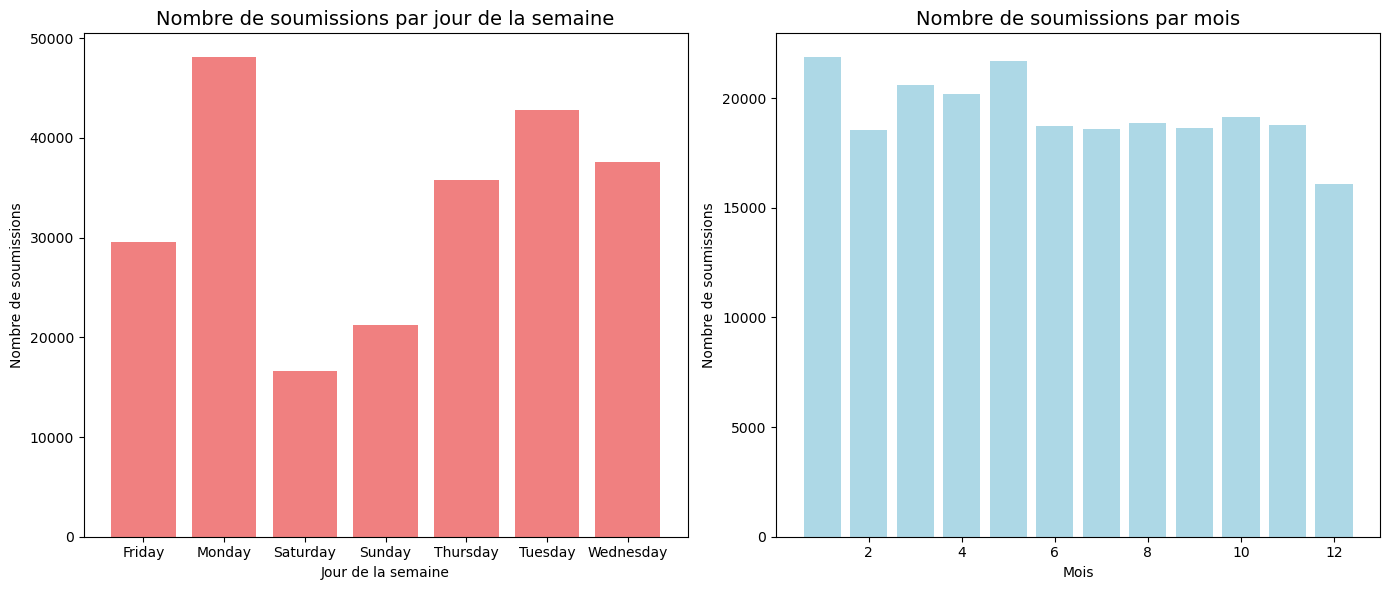

In [76]:
# Grouper par jour de la semaine pour compter les soumissions
day_of_week_group = recipe_woa['day_of_week'].value_counts().sort_index()

# Grouper par mois pour compter les soumissions
month_group = recipe_woa['month'].value_counts().sort_index()

# Créer les barplots
plt.figure(figsize=(14, 6))

# Barplot pour le nombre de soumissions selon le jour de la semaine
plt.subplot(1, 2, 1)
plt.bar(day_of_week_group.index, day_of_week_group.values, color='lightcoral')
plt.title('Nombre de soumissions par jour de la semaine', fontsize=14)
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de soumissions')

# Barplot pour le nombre de soumissions selon le mois de l'année
plt.subplot(1, 2, 2)
plt.bar(month_group.index, month_group.values, color='lightblue')
plt.title('Nombre de soumissions par mois', fontsize=14)
plt.xlabel('Mois')
plt.ylabel('Nombre de soumissions')

# Ajuster l'affichage des graphiques
plt.tight_layout()
plt.show()

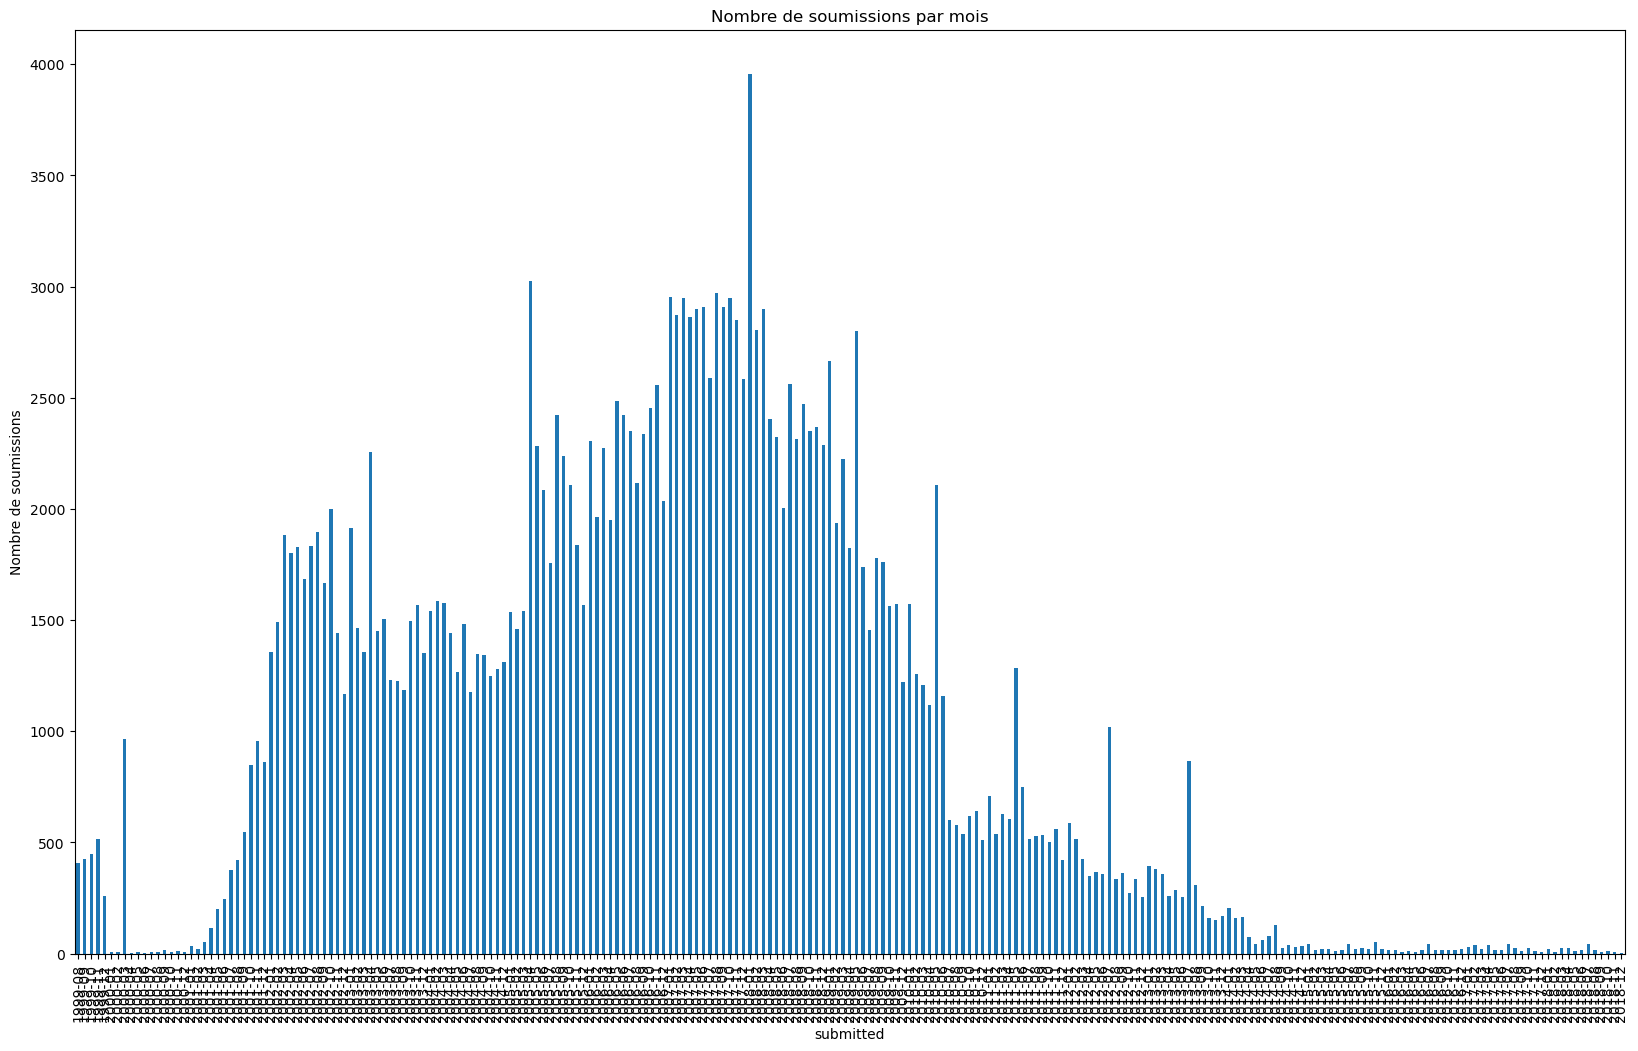

In [77]:
# Grouper par mois et compter le nombre de soumissions
submissions_per_month = recipe_woa.groupby(recipe_woa['submitted'].dt.to_period('M')).size()

# Visualiser les soumissions par mois
submissions_per_month.plot(kind='bar', figsize=(20, 12), title='Nombre de soumissions par mois')
plt.ylabel('Nombre de soumissions')
plt.show()

TAG VARIABLE

In [78]:
## Tag 
l_tag = list(recipe_woa.tags)
list_tag = []
for item in l_tag: 
    item = ast.literal_eval(item)
    for i in item: 
        list_tag.append(i)

In [79]:
print('There are {} unique tag'.format(len(set(list_tag))))

There are 552 unique tag


In [80]:
element_counts = Counter(list_tag)
least_ten = element_counts.most_common()[:-10-1:-1]
print(least_ten)

[('roast-beef-comfort-food', 1), ('roast-beef-main-dish', 1), ('Throw the ultimate fiesta with this sopaipillas recipe from Food.com.', 1), ('chicken-stew', 1), ('chicken-stews', 1), ('chicken-crock-pot', 1), ('less_thansql:name_topics_of_recipegreater_than', 1), ('bread-pudding', 1), ('pumpkin-bread', 1), ('shrimp-main-dish', 1)]


In [81]:
most_twenty = element_counts.most_common(20)
print(most_twenty)

[('preparation', 230540), ('time-to-make', 225320), ('course', 218142), ('main-ingredient', 170444), ('dietary', 165087), ('easy', 126058), ('occasion', 114143), ('cuisine', 91164), ('low-in-something', 85773), ('main-dish', 71784), ('equipment', 70435), ('60-minutes-or-less', 69989), ('number-of-servings', 58946), ('meat', 56041), ('30-minutes-or-less', 55076), ('vegetables', 53813), ('taste-mood', 52142), ('4-hours-or-less', 49494), ('north-american', 48478), ('3-steps-or-less', 44931)]


In [82]:
recipe_woa.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),year,month,day,day_of_week
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,13.0,0.0,2.0,0.0,4.0,2005,9,16,Friday
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,18.0,0.0,17.0,22.0,35.0,1.0,2002,6,17,Monday
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,22.0,32.0,48.0,39.0,27.0,5.0,2005,2,25,Friday
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,17.0,10.0,2.0,14.0,8.0,20.0,2003,4,14,Monday
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,...,1.0,337.0,23.0,3.0,0.0,28.0,2002,10,25,Friday


In [83]:
#enregistrement du fichier en csv
recipe_woa.to_csv("recipe_cleaned.csv", index=False)


GITHUB ne prend que des fichiers max de 100Mo on va donc découper celui-ci en plusieurs fichiers :

In [84]:
# Charger le DataFrame
fichierCSV = pd.read_csv("recipe_cleaned.csv")
# Taille maximale du fichier en octets (100 Mo)
max_file_size = 100 * 1024 * 1024
# Estimer la taille de chaque ligne
row_size = fichierCSV.memory_usage(index=True, deep=True).sum() / len(fichierCSV)
# Calculer le nombre de lignes par fichier
rows_per_file = int(max_file_size / row_size)
# Diviser le DataFrame en morceaux
num_files = (len(fichierCSV) + rows_per_file - 1) // rows_per_file  # Calculer le nombre de fichiers nécessaires
for i in range(num_files):
    start_row = i * rows_per_file
    end_row = min((i + 1) * rows_per_file, len(fichierCSV))
    chunk = fichierCSV.iloc[start_row:end_row]
    chunk.to_parquet(f"recipe_cleaned_part_{i + 1}.parquet", index=False)

**Axes de reflexion** 

FURTHER ANALYSE
- Is there a link between the ingredients and the nutrition score?
- vérifier les tags pour les valeurs abérantes nutritionnelles
- vérifier si les tags peuvent nous donner les quantités par ingrédient
- vérifier si les tags ou la description nous donne le nb de personnes
- passer toutes les data nutritionnelles en échelle log et vérifier leur distribution
- Analyser par type de meal : 'gluten-free', time tags (15/30/60 min or less / 4h or less), 'vegan', 'vegetarian', meat_tags (beef, chicken, pork, seafood...)


Problématique :

Qu'est-ce qui caractérise une MAUVAUSE recette (pas une bonne) ?
Pourquoi les utilisateurs ne sont pas contents ?

CORRELATION NOTES / PROFIL USERS
- moyenne des notes par user
- quel % de users contribue en postant des recettes ? 
- les utilisateurs les plus contributeurs sont-ils ceux qui obtiennent les meilleures notes ? Les new comers obtiennent ils des moins bonnes notes ?

LES NOTES ET REVIEWS - analyse sémantique
- Quels sont les critères de notation des utilisateurs ?
- Qu'est-ce qui fait une mauvaise note ? Plus facile et plus marqué dans les avis. Sera plus difficile avec les bonnes notes. Se concentrer sur les notes inférieures à 4 !
- Est-ce que la longueur des reviews est corrélée avec les notes ? (SPOILER ALERT : pas de corrélation à observer)
- Des reviews avec des éléments d'expression d'exclamation ( !!, lettres majuscules...) ont-ils des notes extremes (basses ou hautes) ?

QUALITE DES RECETTES - BONNES PRATIQUES - NOTES & CONTENUS
- comparer les ratings avec les colonnes de raw_recipe : quels sont les critères d'une bonne contribution et d'une mauvaise recette ? Quelles sont les caractéristiques des recettes les plus/moins populaires ?
- qu'est-ce qui fait qu'une recette est très bien notée / mal notée? quantifier les notes représentatives 
- Quels ingrédients rapportent les meilleures notes ? Les moins bonnes notes ?

L'EXTRA
Lorsqu'un utilisateur contribue en postant une recette, il a directement des bonnes pratiques qui s'affichent pour améliorer la qualité de sa contribution (et réduire le nombre de mauvaises notes, les contributions peu qualitatives).


Si on a encore le temps :

APPLICATION KING : 
Un meal planner pour la semaine, en mode batch cooking : l'utilisateur rentre son diet et le nombre de repas qu'il veut préparer. L'algo lui propose un menu pour la semaine qui optimise : 1. le temps d'exécution (le batch cooking doit être efficace en terme de temps passé / nb de repas préparés), 2/ le meilleur équilibre en terme d'apport nutritionnelles --> manger sain quand on est jeune cadre dynamique.
Ensuite il émettra la liste de courses à faire et proposera un plan d'exécution (la conduction des recettes peut être optimisées : si on a des haricots verts sur deux recettes, on peut les préparer en une étape)